# Notebook Imports

In [92]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import valuation as vl

# Gathering the Dataset

In [2]:
boston_data = load_boston()
print(boston_data)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

## Datapoints and Features

In [3]:
dir(boston_data)  # tells us the name of the attributes .

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
print(boston_data.DESCR)      # details of feature names and their descriptions .

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
type(boston_data)     # type or the form in which the data is stored .

sklearn.utils.Bunch

In [6]:
type(boston_data.data)  # the data is an numpy array 

numpy.ndarray

In [7]:
# Shape of array
boston_data.data.shape

(506, 13)

In [8]:
# Target values .
boston_data.target                 # target values are the output which the features determine .

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
# feature names
boston_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

# Creating Pandas DataFrame 

In [10]:
# convert boston_data to a Dataframe object with columns having feature_names .

data = pd.DataFrame(data=boston_data.data, columns=boston_data.feature_names)

In [11]:
data['Prices'] = boston_data.target   # adding a new column to the dataframe i.e, the prices  

In [12]:
# shows us the first 5 rows of the data .
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Prices  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [13]:
# shows us the last 5 rows of the data .
data.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  Prices  
501     21.0  391.99   9.67    22.4  
502     21.0  396.90   9.08    20.6  
503     21.0  396.90   5.64    23.9  
504     21.0  393.45   6.48    22.0  
505     21.0  396.90   7.88    11.9

In [14]:
data.count()   # gives us the number of rows for each column 

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
Prices     506
dtype: int64

# Cleaning Data - Checking for missing values 

In [15]:
pd.isnull(data)       # shows us any missing data , False = no missing .

CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT  Prices  
0      False  False  False   False  
1      False  False  False   False  
2      False  False  False   False  
3      False  False  False   False  
4      False  False  False   False  
..       ...    ...    ...     ...  
501    False  False  False   False  
502    False  False  False   False  
503    False  False  False   False  
504    False  False  False   False  
505    False  False  False   False  

[506 rows x 14 columns]

In [16]:
# since a lot of values are there it's not possible to go through each and every row and column .
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
Prices     False
dtype: bool

In [17]:
data.info()   # gives us the information about the data .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Prices   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# Visualisation - Using Charts, Distributions and Histograms

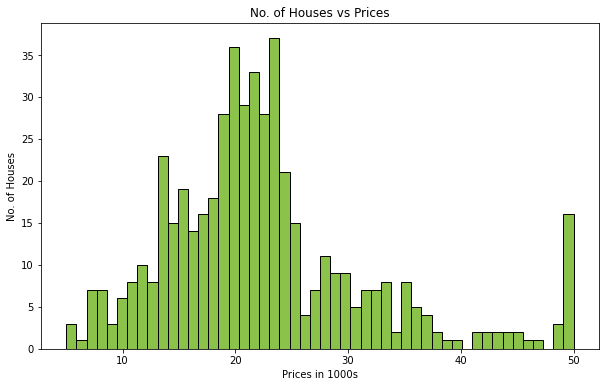

In [18]:
# Using matplotlib 

plt.figure(figsize=(10, 6))

plt.title('No. of Houses vs Prices')
plt.hist(data['Prices'], bins=50, ec='black', color='#8BC34A')
plt.xlabel('Prices in 1000s')
plt.ylabel('No. of Houses')
plt.show()

/home/neelakash/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'No. of Houses')

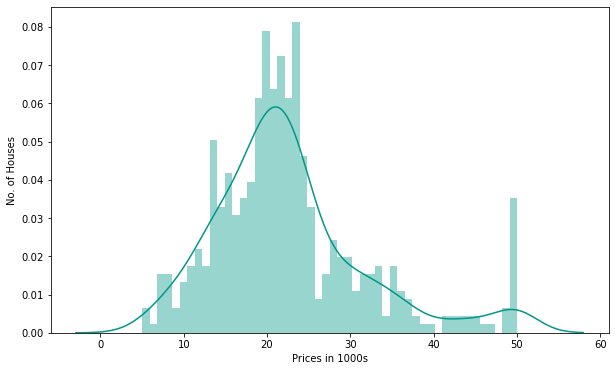

In [19]:
# Using seaborn

plt.figure(figsize=(10,6))
sns.distplot(data['Prices'], color='#009688', bins=50) # use kde=False or hist=False to see either of the graph or the bars
plt.xlabel('Prices in 1000s')
plt.ylabel('No. of Houses')

/home/neelakash/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'No. of Houses')

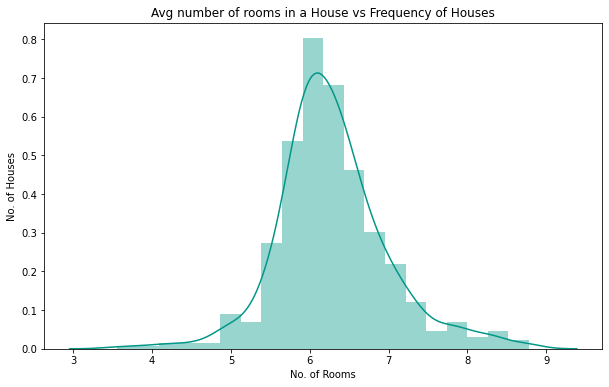

In [20]:
# avg number of rooms in a House vs frequency of Houses

plt.figure(figsize=(10,6))
plt.title('Avg number of rooms in a House vs Frequency of Houses')
sns.distplot(data['RM'], color='#009688', bins=20)
plt.xlabel('No. of Rooms')
plt.ylabel('No. of Houses')

In [21]:
data['RM'].mean()    # mean ie, avg number of rooms in a house in boston .

6.284634387351787

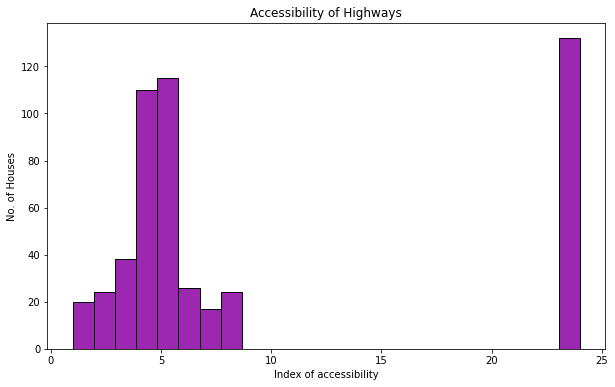

In [22]:
plt.figure(figsize=(10, 6))
plt.title('Accessibility of Highways')

plt.hist(data['RAD'], bins=24, color='#9C27B0', ec='black')
plt.xlabel('Index of accessibility')
plt.ylabel('No. of Houses')

plt.show()

In [23]:
# unique index values and their frequency (or count of the number having that accessibility index)

data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [24]:
frequency = data['RAD'].value_counts()  # data['RAD'] is a pandas series object and .value_counts() also returns a series
                                        # object .

In [25]:
#frequency.index  # since frequency variable here is a series object it has a index-value pair , we can access the index 
                 # values by .index 

frequency.axes[0]  # --> this is another way of achieving the above result . use .axes[1] to obtain the values associated 
                   # with the index. 

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 8.0, 2.0, 1.0, 7.0], dtype='float64')

## Bar plot 

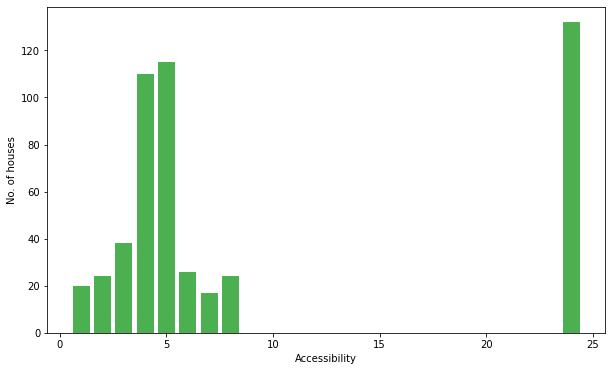

In [26]:
plt.figure(figsize=(10, 6))

plt.bar(frequency.index, height=frequency, color='#4CAF50')
plt.xlabel('Accessibility')
plt.ylabel('No. of houses')

plt.show()

To make a histogram look like a bar plot use the argument rwidth . Value of rwidth must be between 0 and 1 .
Example : plt.hist(data['RAD'], rwidth=0.3, ...)

In [27]:
# No. of houses on the bank of river Charles

data['CHAS'].value_counts()  # 0.0 for not on the banks of river Charles , 1 for houses on the banks of river Charles .

0.0    471
1.0     35
Name: CHAS, dtype: int64

# Descriptive Statistics

In [28]:
# Finding mean, median, max, min of each feature .

data['Prices'].max()

50.0

In [29]:
data['Prices'].min()

5.0

In [30]:
# we can find the max or min or median etc of all features at once 

data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
Prices      50.0000
dtype: float64

In [31]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
Prices      22.532806
dtype: float64

In [32]:
#  we can find the max, min, median, mean etc of all features at once 

data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT      Prices  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

# Correlation 

# $$ \rho_{XY} = corr(X,Y) $$
# $$ -1\leq \rho_{XY} \leq 1 $$

In [33]:
# find correlations between two features .

data['Prices'].corr(data['RM'])

0.6953599470715394

In [34]:
# correlation between prices and pupil-teacher ratio . 

data['Prices'].corr(data['PTRATIO'])

-0.5077866855375621

In [35]:
# find the correlations between all features . 

data.corr()   # pearson correlation coefficients .

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
Prices  -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT    Prices  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
Prices   0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

### Multicollinearity 

When the correlation coefficient between any two or more feature is very close to 1 , it becomes almost impossible to makeout any difference between them and this poses a problem for the model .

# Visualising correlation using Heatmap

In [36]:
mask = np.zeros_like(data.corr())
triangle = np.triu_indices_from(mask)
mask[triangle] = True

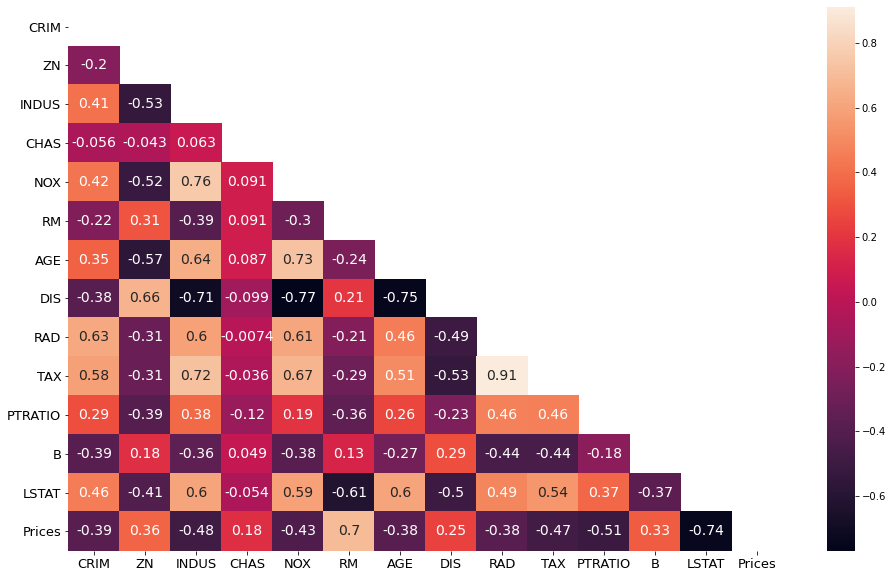

In [37]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size":14})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [38]:
corr_data_1 = round(data['NOX'].corr(data['DIS']), 3)  # relationship between pollution level and distance of employment centres . 

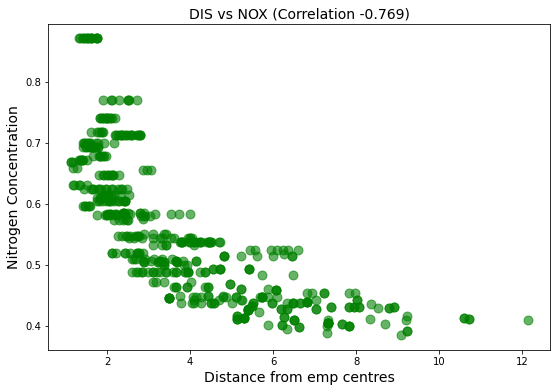

In [39]:
# scatter plot
plt.figure(figsize=(9,6))
plt.scatter(data['DIS'], data['NOX'], color='green', alpha=0.6, s=80)
plt.title(f'DIS vs NOX (Correlation {corr_data_1})', fontsize=14)
plt.xlabel('Distance from emp centres', fontsize=14)
plt.ylabel('Nitrogen Concentration', fontsize=14)
plt.show()


/home/neelakash/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


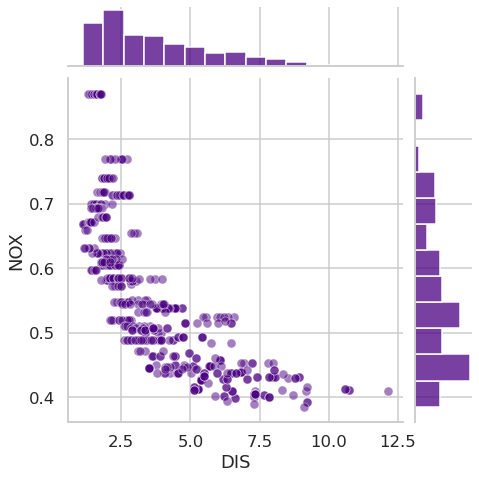

In [40]:
# same using seaborn

sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(data['DIS'], data['NOX'], height=7, joint_kws={'alpha':0.5}, color='indigo')
plt.show()

/home/neelakash/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


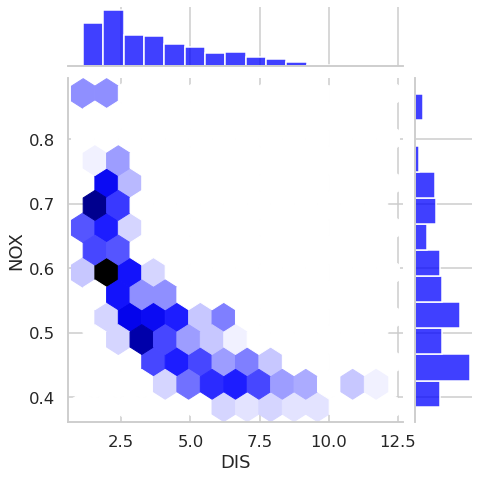

In [41]:
# same using seaborn but kind is set to hex for better understanding the density 

sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(data['DIS'], data['NOX'], height=7, color='blue', kind='hex')
plt.show()

# Working with pairplots 

In [42]:
data['TAX'].corr(data['RAD'])

0.9102281885331871

Even though the correlaion coefficient is quite high we see that the scatter plot is not a linear one , that is due to the presence of the outliers in the data 

/home/neelakash/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


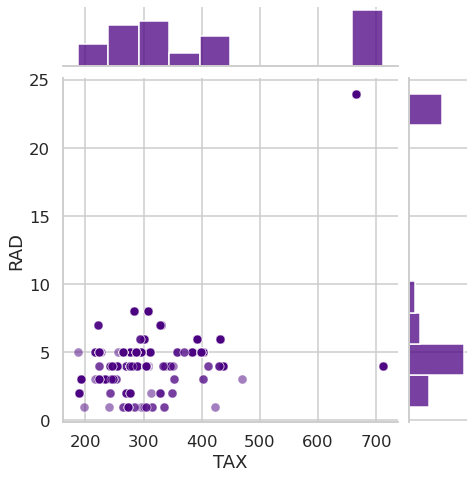

In [43]:
# we see the correlation between 'RAD' and 'TAX' 

sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(data['TAX'], data['RAD'], height=7, joint_kws={'alpha':0.5}, color='indigo')
plt.show()

/home/neelakash/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


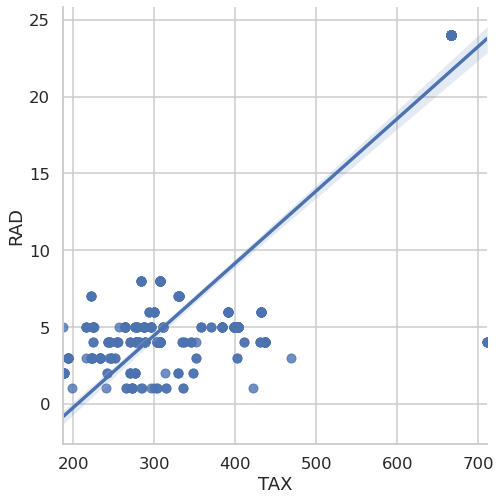

In [44]:
# now we see the above relation by fitting a line .

sns.lmplot('TAX', 'RAD', data=data, height=7)
plt.show()

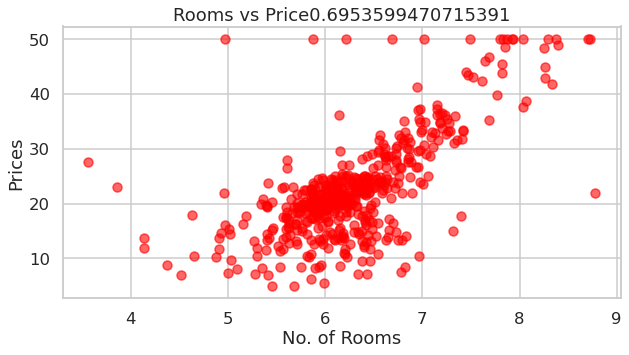

In [45]:
# Since we are interested in predicting the prices, the relation between prices and other attributes are 
# the points of interest for us . 

# Scatter plot b/w No. of Rooms and Prices .

rooms_prices = data['RM'].corr(data['Prices'])

plt.figure(figsize=(10, 5))
plt.title(f'Rooms vs Price{rooms_prices}')
plt.scatter(x=data['RM'], y=data['Prices'], color='red', alpha=0.6)
plt.xlabel('No. of Rooms')
plt.ylabel('Prices')

plt.show()

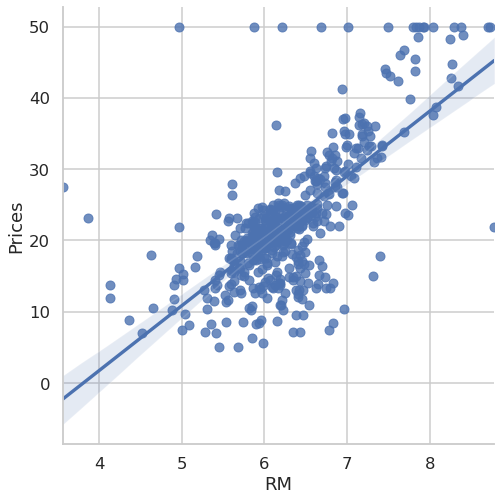

In [46]:
# Regression line of above plot .

sns.lmplot(x='RM', y='Prices', data=data, height=7)
plt.show()

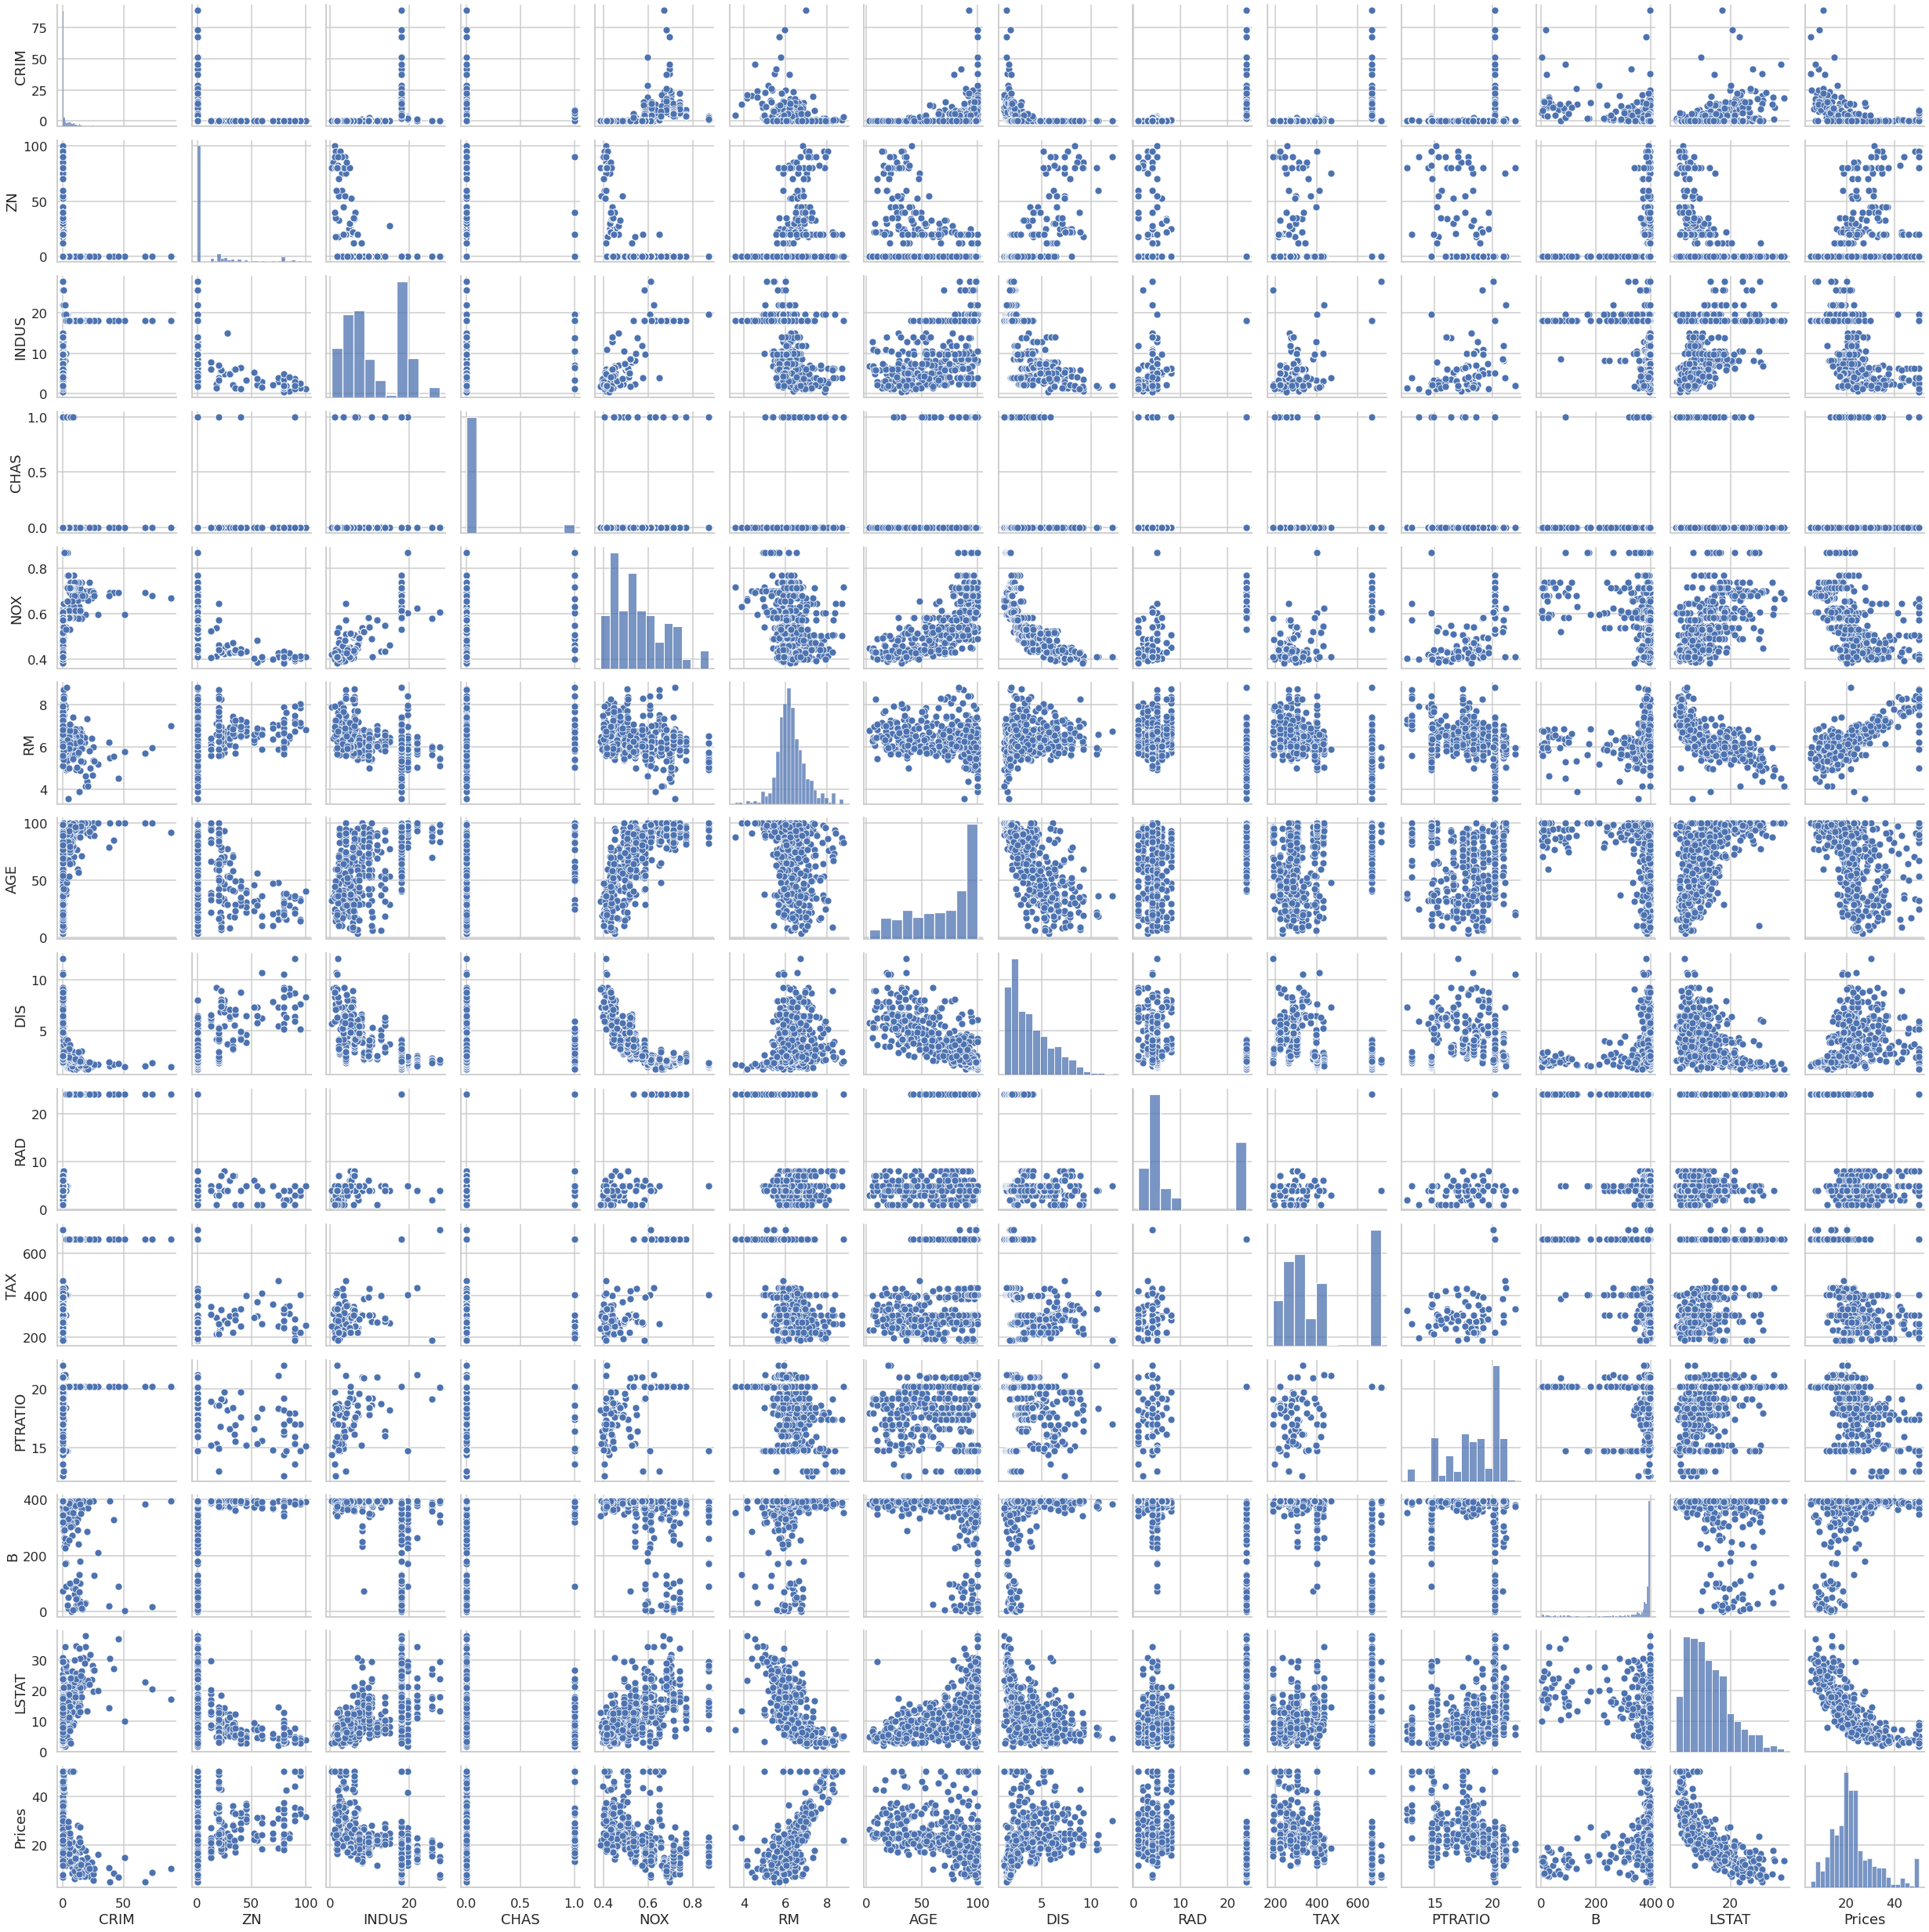

CPU times: user 38.1 s, sys: 174 ms, total: 38.2 s
Wall time: 38.3 s


In [47]:
%%time
# Since it's not possible to plot each and every variable with price seperately we use pairplots .This gives us scatterplot
# relation between all attributes . 

sns.pairplot(data)
plt.show()

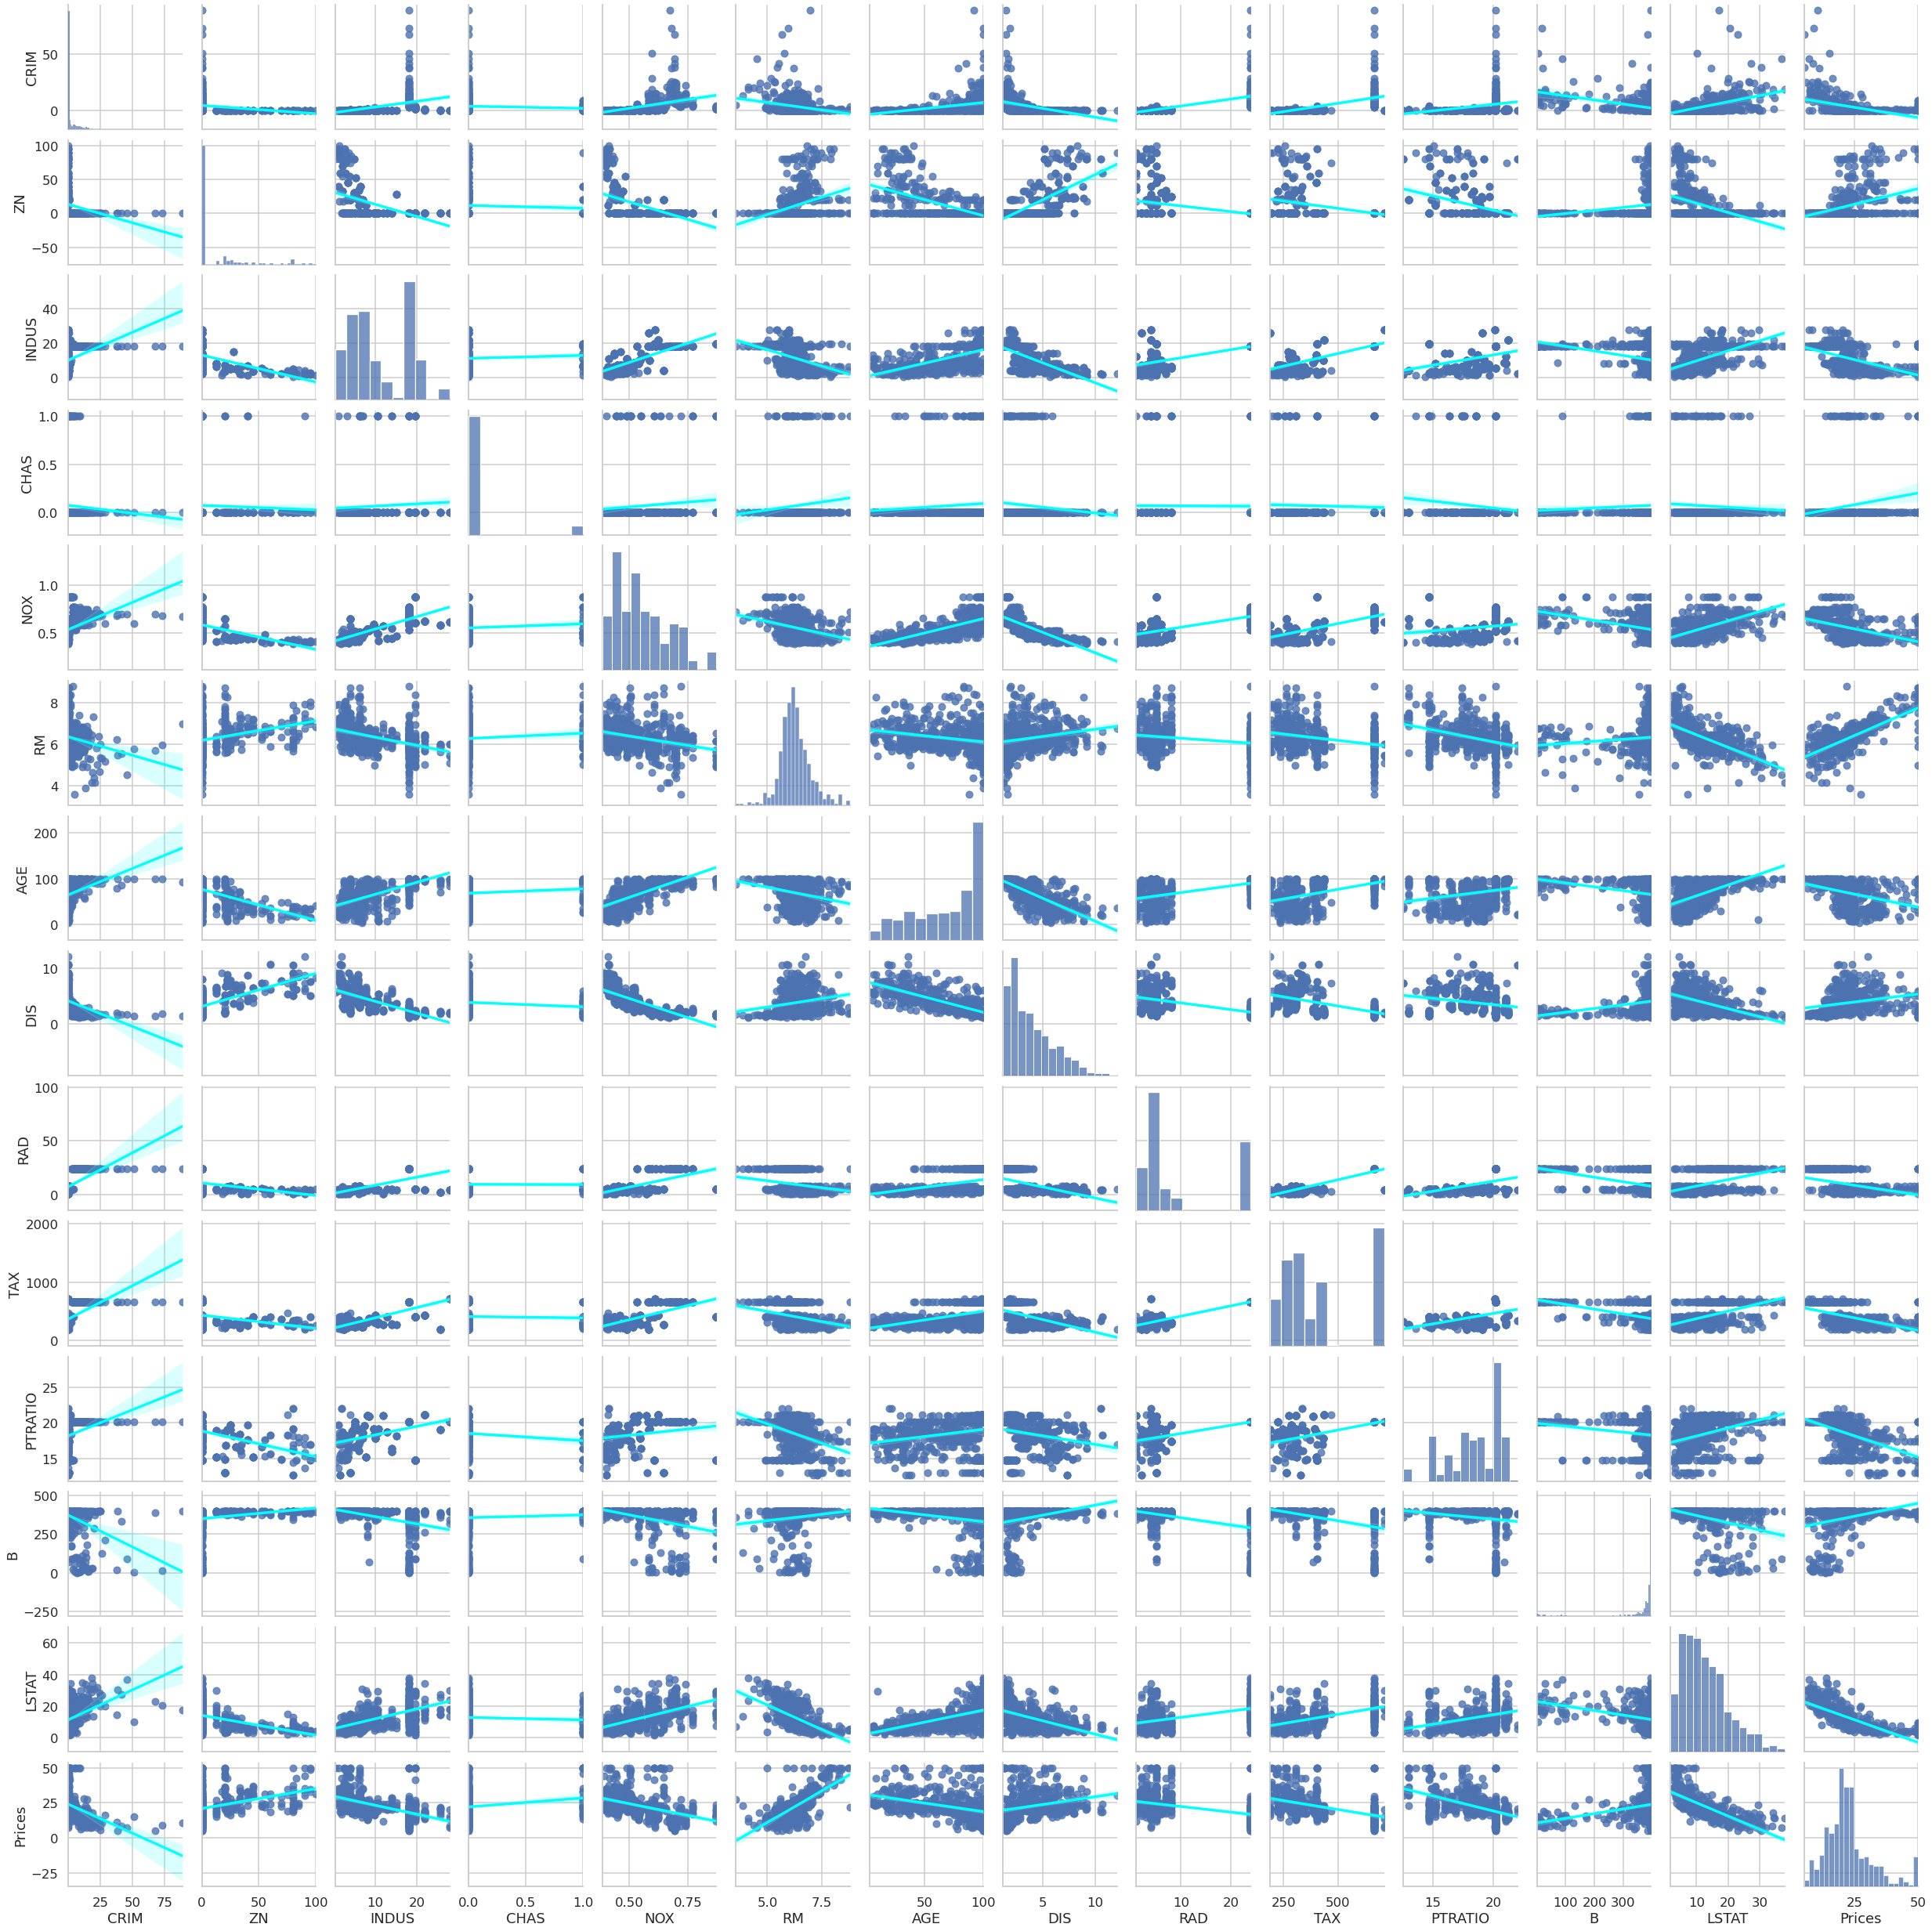

CPU times: user 1min 36s, sys: 2.04 s, total: 1min 38s
Wall time: 1min 8s


In [48]:
%%time
# Now we plot the above with regression lines .

sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

#### Note : Histograms are shown for plots between same attributes , Eg : Prices vs Prices , Crimes vs Crimes etc .

# Testing and Training 

In [49]:
prices = data['Prices']
features = data.drop('Prices', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

In [50]:
# shape of X_train, X_test, Y_train, Y_test
print('Length of X_train: ',X_train.shape)
print('Length of Y_train: ',Y_train.shape)
print('Length of X_test: ',X_test.shape)
print('Length of Y_test: ',Y_test.shape)

Length of X_train:  (404, 13)
Length of Y_train:  (404,)
Length of X_test:  (102, 13)
Length of Y_test:  (102,)


# Equation of the Regression model .
## $$ \hat y = \theta + \theta_1.NOX + \theta_2.RM + \theta_3.CHAS + .....\theta_{13}.LSTAT $$

####   where $ \theta_1 ...\theta_{13}  $ are the coefficients of respective features .  

In [51]:
# Therefore the coefficients are :
regr = LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

In [52]:
# Intercept of the line ie, theta0 or just theta 
print('Intercept: ',regr.intercept_)

Intercept:  36.533051382824354


In [53]:
# Coefficients of the other attributes 
coefs = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficients'])

## The Equation now looks like this :
### $$ \hat y = 36.53 - 16.27NOX + 3.10RM + 1.97CHAS + .....- 0.58LSTAT $$
where $ \hat y $ is the Price 

In [54]:
coefs     # These represent how much these attributes affect the final price of the houses . 

Coefficients
CRIM        -0.128181
ZN           0.063198
INDUS       -0.007576
CHAS         1.974515
NOX        -16.271989
RM           3.108456
AGE          0.016292
DIS         -1.483014
RAD          0.303988
TAX         -0.012082
PTRATIO     -0.820306
B            0.011419
LSTAT       -0.581626

In [55]:
mean_squared_error(Y_train, regr.predict(X_train))

19.23085887937306

In [56]:
print('The r-squared value of training set: ',regr.score(X_train, Y_train))
print('The r-squared value of test set: ',regr.score(X_test, Y_test))

The r-squared value of training set:  0.750121534530608
The r-squared value of test set:  0.6709339839115624


# Multivariable Regression 

Now it's our time to evaluate the model , and apply neccessary changes to it to improve it's efficiency . 
We first check the skewness in the data and then make neccessary changes to it .

In [57]:
# skewness in prices column 
data['Prices'].skew()

1.1080984082549072

In [58]:
# The skewness is quite high , a normal distribution has a skewness of 0 . We'll try and bring it close to something as 
# close as zero . Threrefore we apply log to all values of price column . 
prices_logvalues = np.log(data['Prices'])
prices_logvalues.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: Prices, dtype: float64

In [59]:
prices_logvalues.skew()   # This is much better s compared to the original data

-0.33032129530987864

/home/neelakash/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


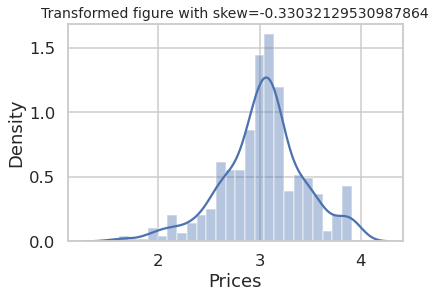

In [60]:
# now we plot it's distplot
sns.distplot(prices_logvalues)
plt.title(f'Transformed figure with skew={prices_logvalues.skew()}', fontsize=14)
plt.show()

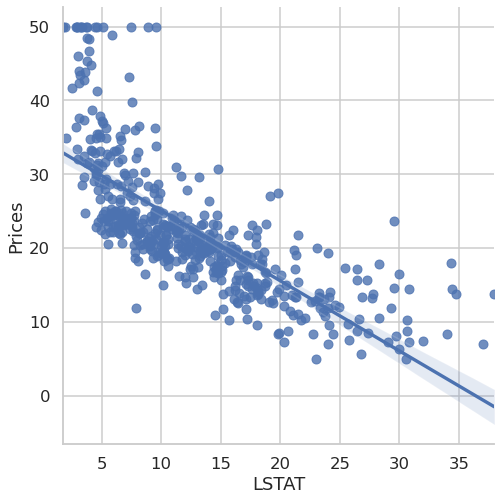

In [61]:
# One without the transformed data .
sns.lmplot(x='LSTAT', y='Prices', data=data, height=7)
plt.show()

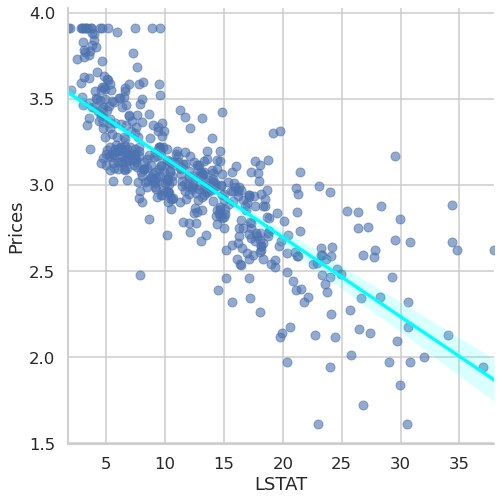

In [62]:
# Now a regression fits better when the data is transformed into log values , to prove this we take the example of
# LSTAT vs Price lmplot, where we plot both the graph one with the transformed data and another without the
# transformed data .

trans_data = features 
trans_data['Prices'] = prices_logvalues

sns.lmplot(x='LSTAT', y='Prices', data=trans_data, height=7, line_kws={'color':'cyan'}, scatter_kws={'alpha':0.6})
plt.show()


In [63]:
# We clearly see the line fits better on the transformed data . Now we rerun our regression using this transformed data . 
prices = np.log(data['Prices']) 
features = data.drop('Prices', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

regr_1 = LinearRegression()
regr_1.fit(X_train, Y_train)

print('Intercept: ',regr_1.intercept_)
print('The r-squared value of training set: ',regr_1.score(X_train, Y_train))
print('The r-squared value of test set: ',regr_1.score(X_test, Y_test))
coefs = pd.DataFrame(data=regr_1.coef_, index=X_train.columns, columns=['Coefficients'])
coefs

Intercept:  4.0599438717752
The r-squared value of training set:  0.7930234826697584
The r-squared value of test set:  0.7446922306260727


Coefficients
CRIM        -0.010672
ZN           0.001579
INDUS        0.002030
CHAS         0.080331
NOX         -0.704068
RM           0.073404
AGE          0.000763
DIS         -0.047633
RAD          0.014565
TAX         -0.000645
PTRATIO     -0.034795
B            0.000516
LSTAT       -0.031390

In [64]:
# Now the intercepts also changed , as a result interpretation would also change , say in our previous data CHAS had a 
# theta of 1.97 which meant to buy a house near CHAS river one had to double their pay , but now the value of theta is 0.08
# that is a log value to get the original value we have to take it's antilog , ie e^(0.08) 

np.e**(0.080331)

# this is the value that is 1.08 , therefore one needs to pay 1.08 times more , this is much more accurate which is  
# clearly evident from the r-score . Therefore 1.97times more pay was a completely wrong estimation . 
# we may see further change in this value as we add more improvements to our model .

1.0836456950439142

# p-values and Evaluating Coefficients

We are again running linear regression on our training dataset but with the help of statsmodels.api module . This provides us with some heavy statistical machinery for better analysis .  

In [65]:
x_part = sm.add_constant(X_train)
final_part = sm.OLS(Y_train, x_part)
res = final_part.fit()
res.params  # These are values of intercepts

const      4.059944
CRIM      -0.010672
ZN         0.001579
INDUS      0.002030
CHAS       0.080331
NOX       -0.704068
RM         0.073404
AGE        0.000763
DIS       -0.047633
RAD        0.014565
TAX       -0.000645
PTRATIO   -0.034795
B          0.000516
LSTAT     -0.031390
dtype: float64

In [66]:
res.pvalues  # These are the p-values , but remember p-vals greater than 0.05 doesn't have much significance . 
             # This would tell us which attributes are actually significant for determining the cost of our houses . 

const      1.188124e-52
CRIM       1.753774e-14
ZN         8.607727e-03
INDUS      4.445368e-01
CHAS       3.824015e-02
NOX        2.729624e-05
RM         1.089112e-04
AGE        2.091731e-01
DIS        1.812912e-07
RAD        3.746363e-07
TAX        5.145680e-05
PTRATIO    7.549821e-09
B          6.326839e-06
LSTAT      3.105305e-37
dtype: float64

In [67]:
pd.DataFrame({'params':res.params, 'p-values':round(res.pvalues, 3)})

params  p-values
const    4.059944     0.000
CRIM    -0.010672     0.000
ZN       0.001579     0.009
INDUS    0.002030     0.445
CHAS     0.080331     0.038
NOX     -0.704068     0.000
RM       0.073404     0.000
AGE      0.000763     0.209
DIS     -0.047633     0.000
RAD      0.014565     0.000
TAX     -0.000645     0.000
PTRATIO -0.034795     0.000
B        0.000516     0.000
LSTAT   -0.031390     0.000

In [68]:
# Therefore INDUS and AGE features have p-values greater than 0.05 , as a result they can be excluded from features 
# while using train_test_split . 

# Testing for multicollinearity 
  $$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ...\alpha _{12} LSTAT $$
  $$ VIF _{TAX} = \frac {1}{(1 - R_{TAX}^{2})} $$

Here we are testing the multi-collinearity of the attribute TAX , TAX is evaluated by fitting a linear regression with respect to the 12 other feature . If we want to evaluate the multi-collinearity of any other attribute say RM we just replace RM with TAX and we will get the multi-collinearity of RM and using this method we can calculate the Multi-Collinearity of all the Attributes . After that we calculate the VIF that is the Variation Inflation Factor using the above formula , where $ R_{TAX}^2 $is the r-squared value of TAX , similarly the VIF of other attributes can be found as well .

If the VIF > threshold (which is statistically considered to be nearly 10 ) then it is said that , that particular attribute has multi-collinearity , that is it's effect on the final output is redundant . 

Effects of Multi-Collinearity :
1) Loss of Reliability .
2) High variability in $ \theta $ values .
3) Strange Findings .

In [69]:
# we will not use above formula rather use a method of stats module to find the VIF . 

In [70]:
variance_inflation_factor(x_part.values, 1) # Now this is VIF for row = 1 (which is our second argument) ie , CRIM . 

1.714525044393249

In [71]:
# We need to VIF of all attributes to determine the multi-collinearity of an attribute .
vif = [variance_inflation_factor(x_part.values, i) for i in range(len(x_part.columns))]

In [72]:
pd.DataFrame({'Columns':x_part.columns, 'VIF':np.around(vif, 2)})

Columns     VIF
0     const  597.55
1      CRIM    1.71
2        ZN    2.33
3     INDUS    3.94
4      CHAS    1.08
5       NOX    4.41
6        RM    1.84
7       AGE    3.33
8       DIS    4.22
9       RAD    7.31
10      TAX    8.51
11  PTRATIO    1.84
12        B    1.34
13    LSTAT    2.81

In [73]:
# What we see is that none of the attributes have a VIF value that is above 10 , therefore none of them faces the problem 
# of multi-collinearity . 

## Model Simplification and Baysian Information Criterion (BIC) 

Baysian Information Criterion (BIC) is a number that determines the quality or the level of optimization , lower the value of BIC , better is the model . Here we'll do feature selection , and discard those features which are less significant and then check whether they increase the quality of the model or not by evaluating the BIC . 

In [74]:
# This is the original model without excluding any attribute . 

x_part = sm.add_constant(X_train)
final_part = sm.OLS(Y_train, x_part)
res = final_part.fit()

org_coef = pd.DataFrame({'params':res.params, 'p-values':round(res.pvalues, 3)})

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Prices   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     114.9
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          1.70e-124
Time:                        13:03:06   Log-Likelihood:                 111.88
No. Observations:                 404   AIC:                            -195.8
Df Residuals:                     390   BIC:                            -139.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0599      0.227     17.880      0.000       3.614       4.506
CRIM          -0.0107      0.001     -7.971      0.000      -0.013      -0.008
ZN             0.0016      0.001      2.641      0.009       0.000       0.003
INDUS          0.0020      0.003      0.765      0.445      -0.003       0.007
CHAS           0.0803      0.039      2.079      0.038       0.004       0.156
NOX           -0.7041      0.166     -4.245      0.000      -1.030      -0.378
RM             0.0734      0.019      3.910      0.000       0.036       0.110
AGE            0.0008      0.001      1.258      0.209      -0.000       0.002
DIS           -0.0476      0.009     -5.313      0.000      -0.065      -0.030
RAD            0.0146      0.003      5.170      0.000       0.009       0.020
TAX           -0.0006      0.000     -4.095      0.000      -0.001      -0.000
PTRATIO       -0.0348      0.006     -5.908      0.000      -0.046      -0.023
B              0.0005      0.000      4.578      0.000       0.000       0.001
LSTAT         -0.0314      0.002    -14.213      0.000      -0.036      -0.027
==============================================================================
Omnibus:                       28.711   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.952
Skew:                           0.093   Prob(JB):                     9.84e-24
Kurtosis:                       5.502   Cond. No.                     1.54e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
print('BIC is: ',res.bic)
print('R-squared is: ',res.rsquared)

BIC is:  -139.7499776947892
R-squared is:  0.7930234826697584


In [76]:
# Here we exclude the feature INDUS because we've seen that it has a p-value > 0.05 . 

x_part = sm.add_constant(X_train)
x_part = x_part.drop('INDUS', axis=1)

final_part = sm.OLS(Y_train, x_part)
res = final_part.fit()

org_coef = pd.DataFrame({'params':res.params, 'p-values':round(res.pvalues, 3)})

print('BIC is: ',res.bic)
print('R-squared is: ',res.rsquared)
if res.bic < -139:
    print('Value of BIC is smaller therefore a better fit')

BIC is:  -145.1450885559114
R-squared is:  0.7927126289415163
Value of BIC is smaller therefore a better fit


In [77]:
# Here we exclude the feature INDUS and AGE because we've seen that it has a p-value > 0.05 . 

x_part = sm.add_constant(X_train)
x_part = x_part.drop(['INDUS', 'AGE'], axis=1)

final_part = sm.OLS(Y_train, x_part)
res = final_part.fit()

org_coef = pd.DataFrame({'params':res.params, 'p-values':round(res.pvalues, 3)})

print('BIC is: ',res.bic)
print('R-squared is: ',res.rsquared)
if res.bic < -145:
    print('Value of BIC is smaller therefore a better fit')

BIC is:  -149.49934294224678
R-squared is:  0.7918657661852816
Value of BIC is smaller therefore a better fit


Excluding the above attributes we see that the BIC decreases but if we exclude features such as LSTAT , the BIC goes upto +17 , therefore we can makeout that LSTAT is a very important feature. 

## Residuals and Residual plots 
1) Plot of Residual vs Predicted values must be random , better if we get a Normal distribution on plotting residual distribution.

2) Mean should be very close to zero . 

3) Residuals must be centred around zero when plot of Residual vs Predicted values is plotted .

Note : $ Residual =  y_{True} - y_{Predicted} $

In [78]:
prices = np.log(data['Prices'])
features = data.drop(['Prices', 'INDUS', 'AGE'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

x_part = sm.add_constant(X_train)
final_part = sm.OLS(Y_train, x_part)
res = final_part.fit()

# There are 2 methods to print the residuals 
residual = Y_train - res.fittedvalues   # method 1

#res.resid  ----> method 2 

In [79]:
# Since we got a high r-squared value the correlation between the fitted values and true values must be quite high .
corr = Y_train.corr(res.fittedvalues)
print(round(corr, 2))

0.89


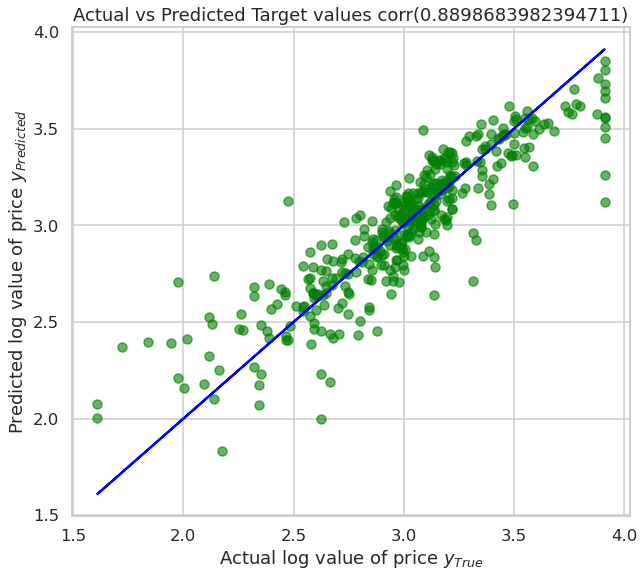

In [80]:
# Now we plot actual log prices vs predicted log prices 
plt.figure(figsize=(10,9))

plt.scatter(x=Y_train, y=res.fittedvalues, color='green', alpha=0.6)
plt.plot(Y_train, Y_train, color='blue')
plt.xlabel('Actual log value of price $ y_{True} $')
plt.ylabel('Predicted log value of price $ y_{Predicted} $')
plt.title(f'Actual vs Predicted Target values corr({corr})')
plt.show()

#Mean squared error
mse_log = round(res.mse_resid, 3)
r_log = round(res.rsquared, 3)

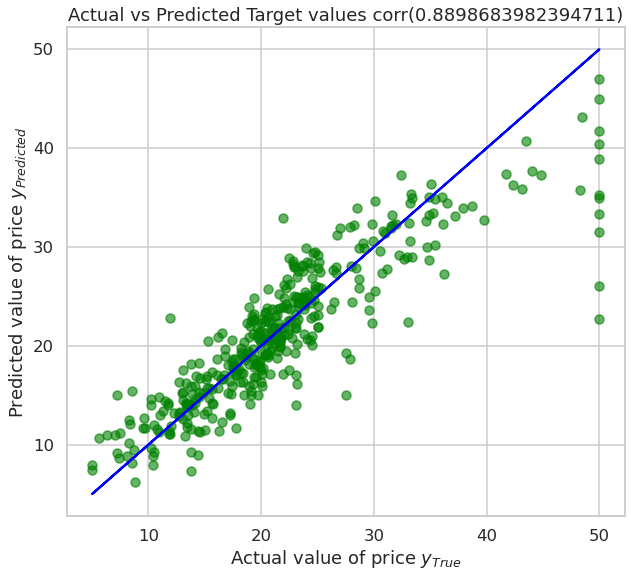

In [81]:
# Now we plot actual prices vs predicted prices 
plt.figure(figsize=(10,9))

plt.scatter(x=np.e**Y_train, y=np.e**res.fittedvalues, color='green', alpha=0.6)
plt.plot(np.e**Y_train, np.e**Y_train, color='blue')
plt.xlabel('Actual value of price $ y_{True} $')
plt.ylabel('Predicted value of price $ y_{Predicted} $')
plt.title(f'Actual vs Predicted Target values corr({corr})')

plt.show()

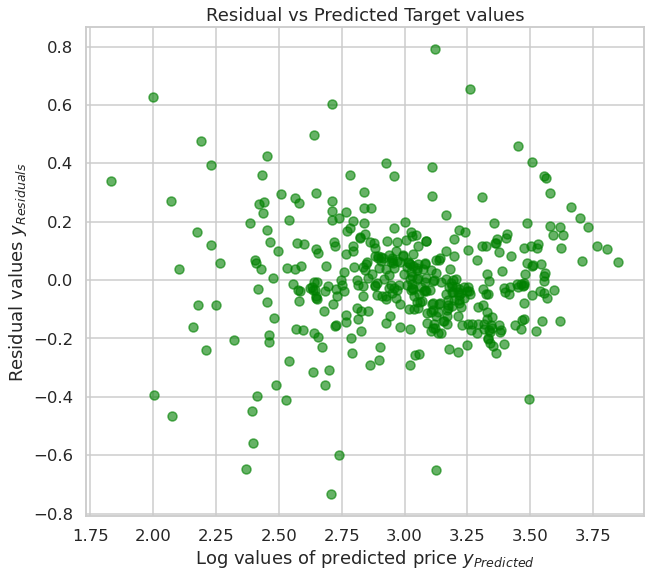

In [82]:
# plot of residuals vs predicted values 
# we observe that there is no clear pattern , clustered around zero , therefore signifying that our model is working fine .

plt.figure(figsize=(10,9))

plt.scatter(x=res.fittedvalues, y=res.resid, color='green', alpha=0.6)
plt.xlabel('Log values of predicted price $ y_{Predicted} $')
plt.ylabel('Residual values $ y_{Residuals} $')
plt.title('Residual vs Predicted Target values')
plt.show()

/home/neelakash/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


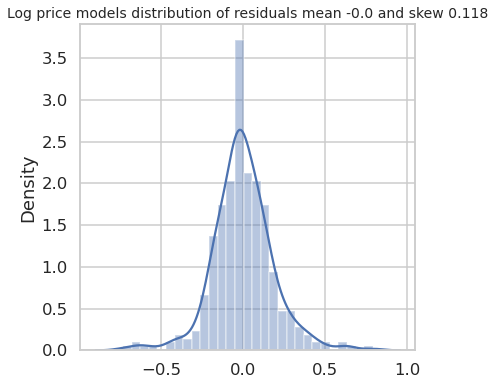

In [83]:
# Distribution of the residuals - checking for normality
# As we know a Normal Distribution has mean = 0, skew = 0 , here also we see mean = 0 and skew very close to zero 
# we can say that we almost have a normal distribution and so our model is good enough .

mean_resid = round(res.resid.mean(), 3)
skew_resid = round(res.resid.skew(), 3)

plt.figure(figsize=(6, 6))
sns.distplot(res.resid)
plt.title(f'Log price models distribution of residuals mean {mean_resid} and skew {skew_resid}', fontsize=14)
plt.show()

In [84]:
# Now we train our data without using the data transformation (log in rhis case) and also exclude some key features and 
# will examine the abnormalities in the model through residual plots .

In [85]:
# using all features and not excluding insignificant features and also not using data transformation . 

prices = data['Prices']
features = data.drop('Prices', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

x_part = sm.add_constant(X_train)
final_part = sm.OLS(Y_train, x_part)

res = final_part.fit()

#Mean squared error
actual_mse = round(res.mse_resid, 3)
actual_r = round(res.rsquared, 3)

0.87


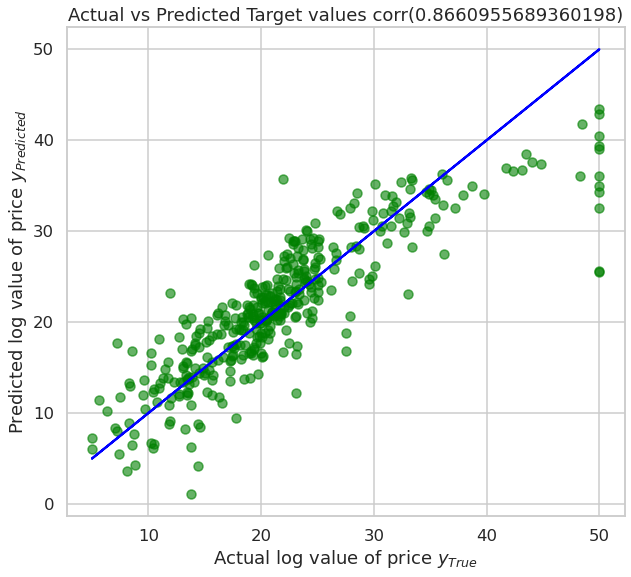

In [86]:
# Here we see that the correlation reduces . 

corr = Y_train.corr(res.fittedvalues)
print(round(corr, 2))

plt.figure(figsize=(10,9))

plt.scatter(x=Y_train, y=res.fittedvalues, color='green', alpha=0.6)
plt.plot(Y_train, Y_train, color='blue')
plt.xlabel('Actual log value of price $ y_{True} $')
plt.ylabel('Predicted log value of price $ y_{Predicted} $')
plt.title(f'Actual vs Predicted Target values corr({corr})')
plt.show()

This graph of residuals vs predicted prices is not actually random and has some pattern in it , it's more sort of a parabolic graph . So our model has some issue that needs to be sorted . 

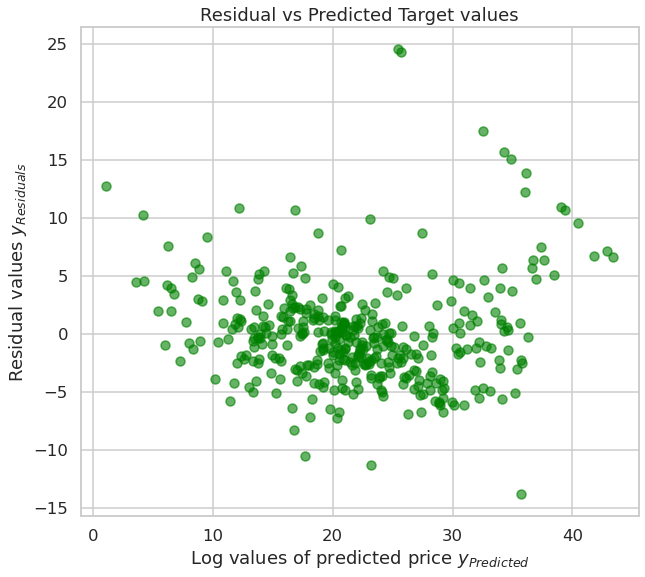

In [87]:
plt.figure(figsize=(10,9))

plt.scatter(x=res.fittedvalues, y=res.resid, color='green', alpha=0.6)
plt.xlabel('Log values of predicted price $ y_{Predicted} $')
plt.ylabel('Residual values $ y_{Residuals} $')
plt.title('Residual vs Predicted Target values')
plt.show()

/home/neelakash/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


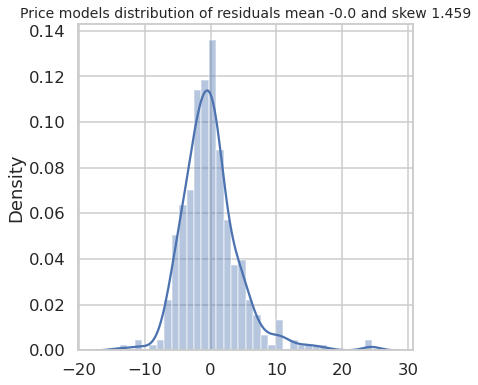

In [88]:
# Though the mean = 0 but our skew is very high , which clearly signifies that it is not a normal distribution . 

mean_resid = round(res.resid.mean(), 3)
skew_resid = round(res.resid.skew(), 3)

plt.figure(figsize=(6, 6))
sns.distplot(res.resid)
plt.title(f'Price models distribution of residuals mean {mean_resid} and skew {skew_resid}', fontsize=14)
plt.show()

0.68


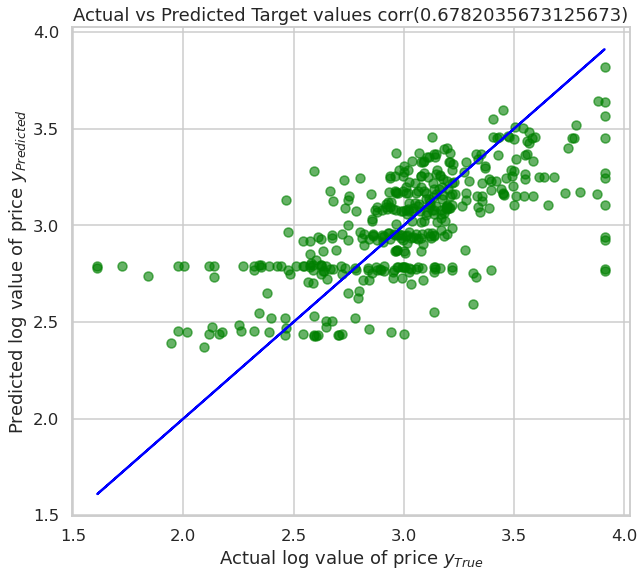

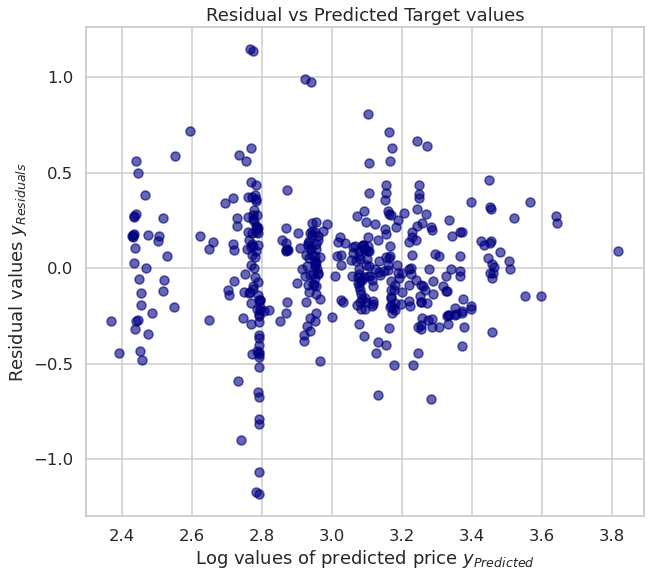

In [89]:
# Now we again train the model leaving out some key features , but here we use log transformation .

prices = np.log(data['Prices'])
features = data.drop(['Prices', 'LSTAT', 'AGE', 'INDUS', 'RM', 'CRIM', 'NOX'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

x_part = sm.add_constant(X_train)
final_part = sm.OLS(Y_train, x_part)

res = final_part.fit()

corr = Y_train.corr(res.fittedvalues)
print(round(corr, 2))

plt.figure(figsize=(10,9))

plt.scatter(x=Y_train, y=res.fittedvalues, color='green', alpha=0.6)
plt.plot(Y_train, Y_train, color='blue')
plt.xlabel('Actual log value of price $ y_{True} $')
plt.ylabel('Predicted log value of price $ y_{Predicted} $')
plt.title(f'Actual vs Predicted Target values corr({corr})')
plt.show()

plt.figure(figsize=(10,9))

plt.scatter(x=res.fittedvalues, y=res.resid, color='navy', alpha=0.6)
plt.xlabel('Log values of predicted price $ y_{Predicted} $')
plt.ylabel('Residual values $ y_{Residuals} $')
plt.title('Residual vs Predicted Target values')
plt.show()

#Mean squared error
omitted_mse_log = round(res.mse_resid, 3)
omitted_r_log = round(res.rsquared, 3)

Here we see a further decrease in the quality of our model , correlation reduces to 0.68 and we see clear patterns in our residual graphs , this is the effect when we leave out important features while training our model .  

# RMSE, MSE and R-Sqaured 

Note : The R-squared value doesn't have any unit it is only a relative measure of fit and the MSE value is a absolute measure of fit , it has the unit of the target value in this case the unit of the houses prices that is thousand dollar . 

The MSE value of 19.921 means that the final price(prediction) of this model shows an error of amount of $ 19,921 but that doesn't mean MSE of 0.035 is better than 19.921 since the value here in Reduced log model is in log transformation . In order to compare them we need to either convert 19.921 to it's equivalent log value or change 0.035 to normal price .   

Lower the value of MSE better is the fit , if MSE is equal to 0 , then it's said to be the best fit but make sure they are all in the same unit before comapring . 

In [90]:
# RMSE is root mean squared error

pd.DataFrame({'MSE':[mse_log, actual_mse, omitted_mse_log], 'R-squared':[r_log, actual_r, omitted_r_log], 
             'RMSE':np.sqrt([mse_log, actual_mse, omitted_mse_log])}, 
             index=['Reduced Log Model', 'Full Normal Price Model', 'Omitted var Model'])

MSE  R-squared      RMSE
Reduced Log Model         0.035      0.792  0.187083
Full Normal Price Model  19.921      0.750  4.463295
Omitted var Model         0.090      0.460  0.300000

In [91]:
# So indeed it's true reduced log model is better as comapred to the original Full Normal Price Model

(np.e**0.035)*1000 < 19.921*1000   

True

In [93]:
# prediction using valuation tool that we made

vl.current_valuation(9, 45, True, True)

Current valuation of the property is: 299000.0
Property upper side range:435000.0, lower side:205000.0
